# Neighborhood Recommendation for visit to Belo Horizonte, Brazil 

## Where to stay? The question every tourist asks himself.

#### I was born in a great city in Brazil. It is called Belo Horizonte, the capital of Minas Gerais State. It is a city with great venues and touristic attractions. It is known for the variety of amazing food, bars and great night life.

#### My friends from other places always ask me for a recommendation of a neighborhood to stay when going to Belo Horizonte, and it is always really hard to just say them a neighborhood. The best neighborhood to stay depends a lot on the visitors tastes and motivations for the trip.

#### So, how to recommend a Neighborhood to stay, depending on the visitors taste and objective? How to have the best information in order to provide that recommendation?

#### I started to search for quality data to back up my recommendations. I wanted some information that could relate to a visitor's needs, such as infrastructure of a neighborhood, access to services, entertainment, etc.

## IQVU and Foursquare Data

#### While surfing the City Council's website, I found data regarding an index on quality of life in urban centers. The Belo Horizonte Urban Quality of Life Index (IQVU-BH) is an index composed of several variables - such as, for example, urban infrastructure, security and education - that seek to quantify the availability of public and private goods and services in the city. The IQVU is calculated for the 80 Planning Units (UPs) in Belo Horizonte (neighborhoods). Its calculation allows the delimitation of priority areas for public investments and a better understanding of the distribution of public and private goods and services between the regions of the city.

#### That IQVU provides a good starting point, for it provides the knowledge of which neighborhoods have good infrastructure and access to services, things that are essential for a tourist.

#### The second part of the data is the one provided by Foursquare API. Once in possession of the best neighborhoods given by the IQVU index, the Foursquare data provides the information about the venues located in that neighborhood, the access to restaurants, bars, nightlife and other meaningful insights on the neighborhoods.

### It is interesting to understand that tourism related business can utilize such types of indexes to recommend places.

________________________________________

### The Dataset

In [98]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!pip install geopy
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

!pip install folium==0.10.0
import folium # map rendering library

print('Libraries imported.')

     |████████████████████████████████| 92kB 5.7MB/s eta 0:00:011
  Found existing installation: folium 0.10.1
    Uninstalling folium-0.10.1:
      Successfully uninstalled folium-0.10.1
Libraries imported.


In [10]:
# location library
!pip install geocoder

#### Neighborhoods dataset: I was able to download a csv table containing all the neighborhoods at City Council's website

##### Load the table into a pandas dataframe in the cell below

In [11]:
# The code was removed by Watson Studio for sharing.

,FID,ID,CODIGO,NOME,AREA_KM2,PERIMETR_M,GEOMETRIA
0,BAIRRO.264,264,1257,Corumbiara,0.054,1253.896,MULTIPOLYGON (((603094.63678959 7787345.199450...
1,BAIRRO.507,507,1674,Vila Betânia,0.020,1547.980,MULTIPOLYGON (((604920.67306699 7792251.346766...
2,BAIRRO.510,510,1668,Ambrosina,0.055,1339.865,MULTIPOLYGON (((606432.210916944 7795405.36142...
3,BAIRRO.619,619,1976,Antônio Ribeiro de Abreu,0.059,2711.485,MULTIPOLYGON (((614811.833402637 7806598.93172...
4,BAIRRO.194,194,819,Vista Alegre,0.459,3986.841,MULTIPOLYGON (((604406.871931668 7793745.33072...


##### Get the latitudes and longitudes for each neighborhood from geocoder

In [ ]:
name_nei = np.asarray(neighs['NOME'])

nei_lat = []
nei_long = []

for name in name_nei:
    geolocator = Nominatim(user_agent="my-application")
    location = geolocator.geocode(name + ', Belo Horizonte')
    try:
        nei_lat.append(location.latitude)
        nei_long.append(location.longitude)
    except AttributeError:
        nei_lat.append('Nan')
        nei_long.append('Nan')

In [6]:
# joing the latitudes and longitudes lists to the neighborhoods dataframe

bh_location_lat = np.array(nei_lat)
bh_location_long = np.array(nei_long)

neighs['latitude'] = pd.Series(nei_lat)

neighs.head()

,FID,ID,CODIGO,NOME,AREA_KM2,PERIMETR_M,GEOMETRIA,latitude
0,BAIRRO.264,264,1257,Corumbiara,0.054,1253.896,MULTIPOLYGON (((603094.63678959 7787345.199450...,-20.0093
1,BAIRRO.507,507,1674,Vila Betânia,0.020,1547.980,MULTIPOLYGON (((604920.67306699 7792251.346766...,-19.977
2,BAIRRO.510,510,1668,Ambrosina,0.055,1339.865,MULTIPOLYGON (((606432.210916944 7795405.36142...,-19.9313
3,BAIRRO.619,619,1976,Antônio Ribeiro de Abreu,0.059,2711.485,MULTIPOLYGON (((614811.833402637 7806598.93172...,-19.8291
4,BAIRRO.194,194,819,Vista Alegre,0.459,3986.841,MULTIPOLYGON (((604406.871931668 7793745.33072...,-19.955


In [7]:
neighs['longitude'] = pd.Series(nei_long)

neighs.head(10)

,FID,ID,CODIGO,NOME,AREA_KM2,PERIMETR_M,GEOMETRIA,latitude,longitude
0,BAIRRO.264,264,1257,Corumbiara,0.054,1253.896,MULTIPOLYGON (((603094.63678959 7787345.199450...,-20.0093,-44.0135
1,BAIRRO.507,507,1674,Vila Betânia,0.020,1547.980,MULTIPOLYGON (((604920.67306699 7792251.346766...,-19.977,-44.0185
2,BAIRRO.510,510,1668,Ambrosina,0.055,1339.865,MULTIPOLYGON (((606432.210916944 7795405.36142...,-19.9313,-43.9828
3,BAIRRO.619,619,1976,Antônio Ribeiro de Abreu,0.059,2711.485,MULTIPOLYGON (((614811.833402637 7806598.93172...,-19.8291,-43.8985
4,BAIRRO.194,194,819,Vista Alegre,0.459,3986.841,MULTIPOLYGON (((604406.871931668 7793745.33072...,-19.955,-43.999
5,BAIRRO.235,235,1157,Itaipu,0.680,4561.449,MULTIPOLYGON (((599422.074901659 7790031.33752...,-19.99,-44.0498
6,BAIRRO.621,621,1974,Ventosa,0.215,4782.578,MULTIPOLYGON (((607383.563665982 7793987.67227...,-19.9472,-43.9729
7,BAIRRO.501,501,1662,Vila São Gabriel,0.022,852.073,MULTIPOLYGON (((613988.654317935 7805110.63680...,-19.8465,-43.9123
8,BAIRRO.620,620,1975,Vila Santa Mônica,0.066,2701.611,MULTIPOLYGON (((605640.673320023 7808248.42614...,-19.8142,-43.9622
9,BAIRRO.502,502,1664,Vila Canto do Sabiá,0.017,589.044,MULTIPOLYGON (((609094.480377956 7807626.56890...,-19.8246,-43.9577


##### Remove the neighborhoods that geocoder was not able to retrieve the data

In [8]:
neighs1 = neighs[neighs['latitude'] != 'Nan']
neighs1.head(10)

,FID,ID,CODIGO,NOME,AREA_KM2,PERIMETR_M,GEOMETRIA,latitude,longitude
0,BAIRRO.264,264,1257,Corumbiara,0.054,1253.896,MULTIPOLYGON (((603094.63678959 7787345.199450...,-20.0093,-44.0135
1,BAIRRO.507,507,1674,Vila Betânia,0.020,1547.980,MULTIPOLYGON (((604920.67306699 7792251.346766...,-19.977,-44.0185
2,BAIRRO.510,510,1668,Ambrosina,0.055,1339.865,MULTIPOLYGON (((606432.210916944 7795405.36142...,-19.9313,-43.9828
3,BAIRRO.619,619,1976,Antônio Ribeiro de Abreu,0.059,2711.485,MULTIPOLYGON (((614811.833402637 7806598.93172...,-19.8291,-43.8985
4,BAIRRO.194,194,819,Vista Alegre,0.459,3986.841,MULTIPOLYGON (((604406.871931668 7793745.33072...,-19.955,-43.999
5,BAIRRO.235,235,1157,Itaipu,0.680,4561.449,MULTIPOLYGON (((599422.074901659 7790031.33752...,-19.99,-44.0498
6,BAIRRO.621,621,1974,Ventosa,0.215,4782.578,MULTIPOLYGON (((607383.563665982 7793987.67227...,-19.9472,-43.9729
7,BAIRRO.501,501,1662,Vila São Gabriel,0.022,852.073,MULTIPOLYGON (((613988.654317935 7805110.63680...,-19.8465,-43.9123
8,BAIRRO.620,620,1975,Vila Santa Mônica,0.066,2701.611,MULTIPOLYGON (((605640.673320023 7808248.42614...,-19.8142,-43.9622
9,BAIRRO.502,502,1664,Vila Canto do Sabiá,0.017,589.044,MULTIPOLYGON (((609094.480377956 7807626.56890...,-19.8246,-43.9577


In [9]:
# drop unnecessary columns from the dataframe
neighs1.drop(['FID','AREA_KM2','PERIMETR_M','GEOMETRIA'], axis=1, inplace=True)
neighs1.head()

/opt/conda/envs/Python36/lib/python3.6/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


,ID,CODIGO,NOME,latitude,longitude
0,264,1257,Corumbiara,-20.0093,-44.0135
1,507,1674,Vila Betânia,-19.977,-44.0185
2,510,1668,Ambrosina,-19.9313,-43.9828
3,619,1976,Antônio Ribeiro de Abreu,-19.8291,-43.8985
4,194,819,Vista Alegre,-19.955,-43.999


### IQVU dataset

#### Get the 15 Neighborhoods with best IQVU - load the dataset that was retrieved from the City Council's website.

In [10]:
# The code was removed by Watson Studio for sharing.

,NOME,IQVU
0,Bairro das Industrias,"0,753675619"
1,Lindeia,"0,679612215"
2,Barreiro de Baixo,"0,751165868"
3,Barreiro de Cima,"0,615177211"
4,Jatobá,"0,627890695"


In [11]:
# get the top 15 neighborhoods
qv_rank = qv.sort_values('IQVU', ascending=False)

qv_rank.reset_index(drop= True, inplace=True)

qv_rank15 = qv_rank.head(15)

qv_rank15

,NOME,IQVU
0,Barro Preto,"0,856586868"
1,Santa Lúcia,"0,824468066"
2,São Bento,"0,824468066"
3,Savassi,"0,804586698"
4,Centro,"0,798798365"
5,Lagoa da Pampulha,"0,798016108"
6,Santa Inês,"0,794606199"
7,Santa Tereza,"0,785570033"
8,Floresta,"0,785570033"
9,Mangabeiras,"0,783575181"


##### Filter and join the neighborhoods and IQVU datasets

In [12]:
# filter the list of neighborhoods with location against the list of the top 15 neighborhoods 
neighs_cs = neighs1[neighs1['NOME'].isin(qv_rank15['NOME'])]

neighs_cs.reset_index(drop=True, inplace=True)

neighs_cs

,ID,CODIGO,NOME,latitude,longitude
0,617,1972,Lagoa da Pampulha,-19.8532,-43.9777
1,12,617,Barro Preto,-19.9234,-43.952
2,68,679,Floresta,-19.9127,-43.9302
3,144,768,Santa Lúcia,-19.9632,-43.9451
4,155,779,São Bento,-19.9577,-43.9532
5,101,718,Mangabeiras,-19.9554,-43.9116
6,154,778,Santo Antônio,-19.9433,-43.9434
7,13,618,Belvedere,-19.9803,-43.9466
8,11,616,Barroca,-19.9337,-43.964
9,150,774,Santa Tereza,-19.9149,-43.917


In [24]:
# append iqvu column to the dataframe 
iqvu_lst = [0.798016108, 0.856586868, 0.785570033, 0.824468066, 0.824468066, 0.783575181, 0.775673299, 0.769292717, 0.765196443, 0.785570033, 0.798798365, 0.775935589, 0.804586698, 0.775655666, 0.794606199]

iqvu_arr = np.asarray(iqvu_lst)

neighs_cs['iqvu'] = iqvu_arr

neighs_cs

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,ID,CODIGO,NOME,latitude,longitude,iqvu
0,617,1972,Lagoa da Pampulha,-19.8532,-43.9777,0.798016
1,12,617,Barro Preto,-19.9234,-43.952,0.856587
2,68,679,Floresta,-19.9127,-43.9302,0.785570
3,144,768,Santa Lúcia,-19.9632,-43.9451,0.824468
4,155,779,São Bento,-19.9577,-43.9532,0.824468
5,101,718,Mangabeiras,-19.9554,-43.9116,0.783575
6,154,778,Santo Antônio,-19.9433,-43.9434,0.775673
7,13,618,Belvedere,-19.9803,-43.9466,0.769293
8,11,616,Barroca,-19.9337,-43.964,0.765196
9,150,774,Santa Tereza,-19.9149,-43.917,0.785570


In [17]:
# @hidden cell
body = client_f4b25a13e9c34e3db7a1e40d9ff90108.get_object(Bucket='courseracapstone-donotdelete-pr-53kt5en7h1bkud',Key='neighs_cs.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

neighs_cs = pd.read_csv(body)

neighs_cs.drop(columns='Unnamed: 0', inplace=True)
neighs_cs


,ID,CODIGO,NOME,latitude,longitude,iqvu
0,617,1972,Lagoa da Pampulha,-19.853209,-43.977749,0.798016
1,12,617,Barro Preto,-19.923382,-43.952011,0.856587
2,68,679,Floresta,-19.912746,-43.930201,0.785570
3,144,768,Santa Lúcia,-19.963226,-43.945101,0.824468
4,155,779,São Bento,-19.957709,-43.953242,0.824468
5,101,718,Mangabeiras,-19.955434,-43.911609,0.783575
6,154,778,Santo Antônio,-19.943329,-43.943420,0.775673
7,13,618,Belvedere,-19.980275,-43.946570,0.769293
8,11,616,Barroca,-19.933743,-43.963996,0.765196
9,150,774,Santa Tereza,-19.914892,-43.917046,0.785570


In [18]:
# sort the neighborhoods by best iqvu - incial insights
neighs_cs.sort_values('iqvu', ascending=False)

,ID,CODIGO,NOME,latitude,longitude,iqvu
1,12,617,Barro Preto,-19.923382,-43.952011,0.856587
3,144,768,Santa Lúcia,-19.963226,-43.945101,0.824468
4,155,779,São Bento,-19.957709,-43.953242,0.824468
12,217,1133,Savassi,-19.935220,-43.934446,0.804587
10,37,642,Centro,-19.919331,-43.940349,0.798798
0,617,1972,Lagoa da Pampulha,-19.853209,-43.977749,0.798016
14,143,767,Santa Inês,-19.890331,-43.909681,0.794606
2,68,679,Floresta,-19.912746,-43.930201,0.785570
9,150,774,Santa Tereza,-19.914892,-43.917046,0.785570
5,101,718,Mangabeiras,-19.955434,-43.911609,0.783575


### Bar Chart - IQVU number per Neighborhood

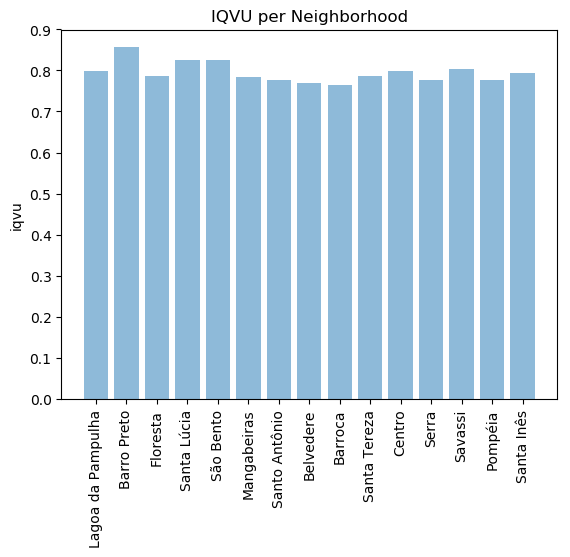

In [20]:
df_neighs = neighs_cs[['NOME','iqvu']]
df_neighs.set_index('NOME')

import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

objects = list(df_neighs['NOME'])
y_pos = np.arange(len(objects))
qv = list(df_neighs['iqvu'])

plt.bar(y_pos, qv, align='center', alpha=0.5)
plt.xticks(y_pos, objects, rotation='vertical')
plt.ylabel('iqvu')
plt.title('IQVU per Neighborhood')

plt.show()

#### Map of Belo Horizonte's top 15 neighborhoods by IQVU

In [57]:
# show an initial map of the top 15 neighborhoods in Belo Horizonte
# create map of Belo Horizonte using entries latitude and longitude values from neighborhood Santo Antônio (central location). 
map_bh = folium.Map(location=[neighs_cs["latitude"][10], neighs_cs["longitude"][10]], zoom_start=12)

# add markers to map
for lat, lng, nome, iqvu in zip(neighs_cs['latitude'], neighs_cs['longitude'], neighs_cs['NOME'], neighs_cs['iqvu']):
    label = '{}, iqvu:{}'.format(nome, iqvu)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_bh)  
    
map_bh

#### Foursquare Dataset - Getting the data for the venues of each of the top 15 neighborhoods

In [22]:
# The code was removed by Watson Studio for sharing.

Your credentails:
CLIENT_ID: JR4WS51DB5KDXCDCD1JQBXF414I0JYESK0JWOZHVSLRZ1CJP
CLIENT_SECRET:MN5SRXTA2NJG5E5SZAC1WCOY4YQBTGINJARTFINSCTLD4QJO


In [23]:
# Get data of first neighborhood
neighborhood_latitude = neighs_cs['latitude'][0] # neighborhood latitude value
neighborhood_longitude = neighs_cs['longitude'][0] # neighborhood longitude value

neighborhood_name = neighs_cs['NOME'][0] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Lagoa da Pampulha are -19.853209, -43.9777494.


In [24]:
# Setup API URL to explore venues near by
LIMIT = 100
radius = 500
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, VERSION, neighborhood_latitude, neighborhood_longitude, radius, LIMIT)
neighborhood_json = requests.get(url).json()

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']
    
venues = neighborhood_json['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

,name,categories,lat,lng
0,Lagoa da Pampulha,Lake,-19.854620,-43.979804
1,Pista de Corrida da Lagoa,Racecourse,-19.855051,-43.976300
2,Casa Kubitschek,Museum,-19.854963,-43.980136
3,Guana Trainer - Lagoa da Pampulha,Athletics & Sports,-19.854170,-43.980451
4,Iate Tênis Clube,Water Park,-19.854157,-43.976040


In [25]:
# function to get the venues for all the neighborhoods
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name,
            lat, 
            lng,
            v['venue']['name'],
            v['venue']['id'],
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue',
                  'id',           
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [89]:
# Execute function to get all venues fo the neighborhoods
cs_venues_d = getNearbyVenues(names=neighs_cs['NOME'],
                                   latitudes=neighs_cs['latitude'],
                                   longitudes=neighs_cs['longitude']
                                  )

Lagoa da Pampulha
Barro Preto
Floresta
Santa Lúcia
São Bento
Mangabeiras
Santo Antônio
Belvedere
Barroca
Santa Tereza
Centro
Serra
Savassi
Pompéia
Santa Inês


In [90]:
cs_venues_d.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,id,Venue Latitude,Venue Longitude,Venue Category
0,Lagoa da Pampulha,-19.853209,-43.977749,Lagoa da Pampulha,4b69f01cf964a52025bd2be3,-19.854620,-43.979804,Lake
1,Lagoa da Pampulha,-19.853209,-43.977749,Pista de Corrida da Lagoa,4ec6edaf8b81dcfdc2cf5500,-19.855051,-43.976300,Racecourse
2,Lagoa da Pampulha,-19.853209,-43.977749,Casa Kubitschek,523b344a498e9f8caa6bf037,-19.854963,-43.980136,Museum
3,Lagoa da Pampulha,-19.853209,-43.977749,Guana Trainer - Lagoa da Pampulha,4e845b2a77c8a32bced089b0,-19.854170,-43.980451,Athletics & Sports
4,Lagoa da Pampulha,-19.853209,-43.977749,Iate Tênis Clube,4bcda17c937ca59309fdac92,-19.854157,-43.976040,Water Park


In [91]:
# total number of locations collected
cs_venues_d.shape

(607, 8)

#### Group the quatity of venues of each neighborhood

In [92]:
grouped_nei = cs_venues_d.groupby('Neighborhood').count()

grouped_nei.reset_index(inplace=True)

grouped_nei

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,id,Venue Latitude,Venue Longitude,Venue Category
0,Barro Preto,47,47,47,47,47,47,47
1,Barroca,41,41,41,41,41,41,41
2,Belvedere,31,31,31,31,31,31,31
3,Centro,98,98,98,98,98,98,98
4,Floresta,65,65,65,65,65,65,65
5,Lagoa da Pampulha,13,13,13,13,13,13,13
6,Mangabeiras,10,10,10,10,10,10,10
7,Pompéia,17,17,17,17,17,17,17
8,Santa Inês,30,30,30,30,30,30,30
9,Santa Lúcia,40,40,40,40,40,40,40


#### Bar Chart - Venues per Neighborhood 

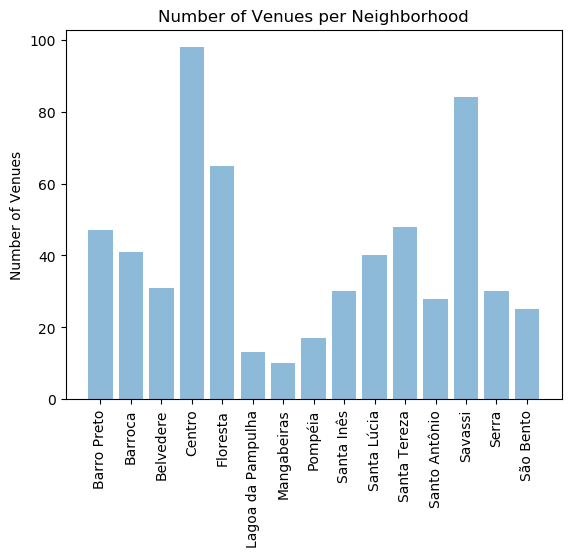

In [93]:
df_venues_qt = grouped_nei[['Neighborhood','Venue']]
df_venues_qt.set_index('Neighborhood')

import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

objects = list(df_venues_qt['Neighborhood'])
y_pos = np.arange(len(objects))
qv = list(df_venues_qt['Venue'])

plt.bar(y_pos, qv, align='center', alpha=0.5)
plt.xticks(y_pos, objects, rotation='vertical')
plt.ylabel('Number of Venues')
plt.title('Number of Venues per Neighborhood')

plt.show()

### Group the venues by neighborhood and category - it is a very good insight depending on the vistors tastes.

In [94]:
grouped_nei1 = cs_venues_d.groupby(['Neighborhood', 'Venue Category']).count()

In [95]:
grouped_nei1

Neighborhood Latitude  \
Neighborhood      Venue Category                                         
Barro Preto       ATM                                                1   
                  BBQ Joint                                          1   
                  Bakery                                             1   
                  Bar                                                1   
                  Brazilian Restaurant                               6   
                  Buffet                                             1   
                  Burger Joint                                       1   
                  Café                                               2   
                  Chinese Restaurant                                 1   
                  Chocolate Shop                                     1   
                  Cosmetics Shop                                     1   
                  Dance Studio                                       1   
                  Department Store                                   1   
                  Empada House                                       1   
                  Food & Drink Shop                                  1   
                  Gym / Fitness Center                               3   
                  Hostel                                             2   
                  Ice Cream Shop                                     2   
                  Italian Restaurant                                 1   
                  Juice Bar                                          1   
                  Mineiro Restaurant                                 1   
                  Pool                                               1   
                  Record Shop                                        1   
                  Restaurant                                         6   
                  Sandwich Place                                     1   
                  Snack Place                                        4   
                  Supermarket                                        1   
                  Vegetarian / Vegan Restaurant                      2   
Barroca           Bakery                                             4   
                  Bar                                                6   
                  Brazilian Restaurant                               1   
                  Buffet                                             1   
                  Burger Joint                                       2   
                  Cosmetics Shop                                     1   
                  Dance Studio                                       1   
                  Dessert Shop                                       1   
                  Dive Bar                                           1   
                  Food Truck                                         1   
                  Gym / Fitness Center                               5   
                  Ice Cream Shop                                     2   
                  Italian Restaurant                                 1   
                  Lingerie Store                                     1   
                  Martial Arts Dojo                                  2   
                  Pet Store                                          1   
                  Pizza Place                                        1   
                  Restaurant                                         1   
                  Rock Club                                          1   
                  Shopping Mall                                      2   
                  Snack Place                                        3   
                  Sports Bar                                         1   
                  Women's Store                                      1   
Belvedere         Bar                                                1   
                  Brazilian Restaurant               

### Map of the venues by neighborhood - each marker represents a venue and if click they show the name of the venue and it's category. A great way to have a better special comprehension of what each neighborhood offers.

In [117]:
# create the map
from IPython.display import display
map_bh2 = folium.Map(location=[-19.943329, -43.943420], zoom_start=12)

In [118]:
display(map_bh2)

#### Almost all the time, i was able to add the markers and produce the map normally by the cell below. Sometimes, folium seems to stop working and does not display the map.

#### The problem is the pop up

In [121]:
# add markers to map ()
for lat, lng, name, cat in zip(cs_venues_d['Venue Latitude'], cs_venues_d['Venue Longitude'], cs_venues_d['Venue'], cs_venues_d['Venue Category']):
    #label = '{}, {}'.format(name, cat)
    #label = folium.Popup(label, parse_html=True)
    folium.CircleMarker([lat, lng], radius=3, color='blue', fill=True, fill_color='#3186cc', fill_opacity=0.7, parse_html=False).add_to(map_bh2) 
                        
    #popup=label, color='blue', fill=True, fill_color='#3186cc', fill_opacity=0.7, parse_html=False).add_to(map_bh2)
    
display(map_bh2)

## Clustering the Neighborhoods by IQVU

In [72]:
# import sklearn kmeans
from sklearn.cluster import KMeans

In [73]:
neighs_cs.head()

,ID,CODIGO,NOME,latitude,longitude,iqvu
0,617,1972,Lagoa da Pampulha,-19.853209,-43.977749,0.798016
1,12,617,Barro Preto,-19.923382,-43.952011,0.856587
2,68,679,Floresta,-19.912746,-43.930201,0.785570
3,144,768,Santa Lúcia,-19.963226,-43.945101,0.824468
4,155,779,São Bento,-19.957709,-43.953242,0.824468


In [74]:
#process X = IQVU values 
from sklearn.preprocessing import StandardScaler
X = neighs_cs[['iqvu']].values

In [75]:
Clus_dataSet = StandardScaler().fit_transform(X)
Clus_dataSet

array([[ 0.14536449],
       [ 2.58996693],
       [-0.37410471],
       [ 1.2494055 ],
       [ 1.2494055 ],
       [-0.45736502],
       [-0.78717054],
       [-1.05348067],
       [-1.22444928],
       [-0.37410471],
       [ 0.17801401],
       [-0.77622319],
       [ 0.41960509],
       [-0.7879065 ],
       [ 0.0030431 ]])

In [76]:
# clusters by kmeans
clusterNum = 4
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 13)
k_means.fit(X)
labels = k_means.labels_
print(labels)

[2 3 0 1 1 0 0 0 0 0 2 0 2 0 2]


In [77]:
# append each neighborhood cluster to the dataframe
neighs_cs["Clus_km"] = labels
neighs_cs.head(15)

,ID,CODIGO,NOME,latitude,longitude,iqvu,Clus_km
0,617,1972,Lagoa da Pampulha,-19.853209,-43.977749,0.798016,2
1,12,617,Barro Preto,-19.923382,-43.952011,0.856587,3
2,68,679,Floresta,-19.912746,-43.930201,0.785570,0
3,144,768,Santa Lúcia,-19.963226,-43.945101,0.824468,1
4,155,779,São Bento,-19.957709,-43.953242,0.824468,1
5,101,718,Mangabeiras,-19.955434,-43.911609,0.783575,0
6,154,778,Santo Antônio,-19.943329,-43.943420,0.775673,0
7,13,618,Belvedere,-19.980275,-43.946570,0.769293,0
8,11,616,Barroca,-19.933743,-43.963996,0.765196,0
9,150,774,Santa Tereza,-19.914892,-43.917046,0.785570,0


#### It is possible to visualize in the table above that there was only 1 neighborhood in cluster 3 -> highest IQVU score.

#### 2 neighborhoods in cluster 1 -> very good IQVU score

#### 4 neighborhoods in cluster 2 -> good IQVU score

#### 7 neighborhoods in cluster 0 -> lowest IQVU scores

In [78]:
# means of each cluster
neighs_cs.groupby('Clus_km').mean()

,ID,CODIGO,latitude,longitude,iqvu
Clus_km,,,,,
0,100.0,716.375,-19.936328,-43.929212,0.777059
1,149.5,773.500,-19.960467,-43.949171,0.824468
2,253.5,1128.500,-19.899523,-43.940556,0.799002
3,12.0,617.000,-19.923382,-43.952011,0.856587


##### Map with the location of each neighborhood -> marker colors display the cluster each neighborhood belongs

In [79]:
map_clusters = folium.Map(location=[-19.943329, -43.943420], zoom_start=12)

# set color scheme for the clusters
x = np.arange(clusterNum)
ys = [i + x + (i*x)**2 for i in range(clusterNum)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(neighs_cs['latitude'], neighs_cs['longitude'], neighs_cs['NOME'], neighs_cs['Clus_km']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

### Other Insights and possible conclusions

### We can build an index out of the mean of the number of venues per neighborhood and the IQVU score.

#### We standardize the values for IQVU and number of places per neighborhood to better weight the numbers.

In [81]:
#number of venues per neighborhood
num_nei = grouped_nei[['Neighborhood', 'Venue']]
num_nei

,Neighborhood,Venue
0,Barro Preto,47
1,Barroca,41
2,Belvedere,31
3,Centro,98
4,Floresta,65
5,Lagoa da Pampulha,13
6,Mangabeiras,10
7,Pompéia,17
8,Santa Inês,30
9,Santa Lúcia,40


In [82]:
# 2d array of number of venues per neighborhood
v = [[13], [47], [65], [40], [25], [10], [28], [31], [41], [48], [98], [30], [84], [17], [30]]

# normalize array
num_array = StandardScaler().fit_transform(v)

num_array

array([[-1.13118534],
       [ 0.26906836],
       [ 1.01037914],
       [-0.01921917],
       [-0.63697815],
       [-1.25473713],
       [-0.51342635],
       [-0.38987456],
       [ 0.02196476],
       [ 0.31025229],
       [ 2.3694489 ],
       [-0.43105849],
       [ 1.79287385],
       [-0.96644961],
       [-0.43105849]])

In [86]:
neighs_cs_ind = neighs_cs.copy()

In [87]:
# create the index by the mean between IQVU and number of venues per neighborhood
neighs_cs_ind['mean'] = (num_array + Clus_dataSet / 2)

# sort in descending order
neighs_cs_ind.sort_values(['mean'], ascending=False)

,ID,CODIGO,NOME,latitude,longitude,iqvu,Clus_km,mean
10,37,642,Centro,-19.919331,-43.940349,0.798798,2,2.458456
12,217,1133,Savassi,-19.935220,-43.934446,0.804587,2,2.002676
1,12,617,Barro Preto,-19.923382,-43.952011,0.856587,3,1.564052
2,68,679,Floresta,-19.912746,-43.930201,0.785570,0,0.823327
3,144,768,Santa Lúcia,-19.963226,-43.945101,0.824468,1,0.605484
9,150,774,Santa Tereza,-19.914892,-43.917046,0.785570,0,0.123200
4,155,779,São Bento,-19.957709,-43.953242,0.824468,1,-0.012275
14,143,767,Santa Inês,-19.890331,-43.909681,0.794606,2,-0.429537
8,11,616,Barroca,-19.933743,-43.963996,0.765196,0,-0.590260
11,172,797,Serra,-19.940556,-43.918423,0.775936,0,-0.819170


### Recommendation of Neighborhoods

#### By the resulys presented in the table above, the neighborhoods Centro and Savassi would be good recomendations. Of course there are other factors to consider but they present a good indicator.

#### Once the visitor provides the purpose of his visit and his tastes, I can look through this data and provide an indication of a neighborhood him to be staying in, with greater certainty.

## Thank You!